(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. We will also analyze the creation dates of questions.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/datascience16/lectures/blob/master/Lecture2/Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve the questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [14]:
import requests

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print response

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [3]:
print response.text

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [2]:
import json

print json.dumps(response.json(), indent=2)

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [4]:
import time, datetime
def print_creation_dates_json(response):
    data = json.loads(response.text)
    items = data['items']
    for element in items:
        #print element['creation_date']
        print datetime.datetime.utcfromtimestamp(int(element['creation_date']))

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [9]:
#1420088400
import requests
import json
import time

def pullAllPages(response):
    data = json.loads(response.text)
    print_creation_dates_json(response)
    page = 2
    while(data['has_more'] == True):
        start_time = 1420070400 # 01-01-2015 at 00:00:00
        end_time   = 1420156800 # 01-02-2015 at 00:00:00
        time.sleep(1)
        response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100&page=" + str(page) +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
        page = page + 1
        data = json.loads(response.text)
        print_creation_dates_json(response)
    
response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100&page=1" +
                        "&fromdate=1420070400&todate=1420156800&order=asc&sort=creation&site=stackoverflow")

pullAllPages(response)

2015-01-01 00:00:58
2015-01-01 00:01:43
2015-01-01 00:02:32
2015-01-01 00:02:57
2015-01-01 00:03:31
2015-01-01 00:04:01
2015-01-01 00:05:03
2015-01-01 00:05:27
2015-01-01 00:05:34
2015-01-01 00:06:17
2015-01-01 00:06:41
2015-01-01 00:07:28
2015-01-01 00:07:39
2015-01-01 00:07:46
2015-01-01 00:09:28
2015-01-01 00:10:05
2015-01-01 00:10:29
2015-01-01 00:11:43
2015-01-01 00:12:02
2015-01-01 00:12:55
2015-01-01 00:13:04
2015-01-01 00:13:32
2015-01-01 00:13:50
2015-01-01 00:15:40
2015-01-01 00:17:11
2015-01-01 00:18:50
2015-01-01 00:22:16
2015-01-01 00:23:14
2015-01-01 00:23:50
2015-01-01 00:24:28
2015-01-01 00:25:07
2015-01-01 00:25:29
2015-01-01 00:25:39
2015-01-01 00:26:42
2015-01-01 00:27:01
2015-01-01 00:27:54
2015-01-01 00:28:49
2015-01-01 00:30:43
2015-01-01 00:32:22
2015-01-01 00:32:34
2015-01-01 00:33:17
2015-01-01 00:33:50
2015-01-01 00:34:15
2015-01-01 00:34:41
2015-01-01 00:36:50
2015-01-01 00:37:18
2015-01-01 00:37:47
2015-01-01 00:38:05
2015-01-01 00:39:37
2015-01-01 00:39:39


Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/kzhao/teaching/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. Note that this file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may also want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on this file, you will get a `MemoryError`.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 3 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Save the `DataFrame` to a file named `question_dataframe.csv` using `to_csv()`. **(10 pts)**

In [23]:
import pandas as pd
import xml.etree.ElementTree as etree

def fetchData():
    #df = pd.DataFrame(columns=('Id', 'CreationDate', 'OwnerUserId', 'Tag'))
    my_dict = {}
    count = 0
    for event, elem in etree.iterparse('stackoverflow-posts-2015.xml'):
        try:
            if(elem.attrib['PostTypeId'] == '1'):
                tag = elem.attrib['Tags']
                tag = tag.split('>')[0][1:]
                Id = elem.attrib['Id']
                date = elem.attrib['CreationDate']
                try:
                    owner = elem.attrib['OwnerUserId']
                except:
                    owner = elem.attrib['OwnerDisplayName']
            
                list1 = [Id, date, owner,tag]
                my_dict[count] = list1
                list1 = []
                count = count + 1
            elem.clear()
        except Exception,e: print str(e)
    #print my_dict
    df = pd.DataFrame(my_dict) 
    res = df.transpose()
    res.columns = ['id', 'date', 'ownerId', 'tag']
    res.to_csv('question_dataframe.csv', encoding='utf-8')
    print 'End'
    
    

In [24]:
import pandas as pd
fetchData()
#question_df = pd.read_csv('question_dataframe_sample.csv')
question_df = pd.read_csv('question_dataframe.csv')
print question_df

'PostTypeId'
         Unnamed: 0        id                     date     ownerId  \
0                 0  27727385  2015-01-01T00:00:58.253     3210431   
1                 1  27727388  2015-01-01T00:01:43.673      868779   
2                 2  27727391  2015-01-01T00:02:32.123     4372672   
3                 3  27727393  2015-01-01T00:02:57.983     2482149   
4                 4  27727394  2015-01-01T00:03:31.337     4263870   
5                 5  27727396  2015-01-01T00:04:01.407     4409381   
6                 6  27727406  2015-01-01T00:05:03.773      875317   
7                 7  27727407  2015-01-01T00:05:27.167      821742   
8                 8  27727408  2015-01-01T00:05:34.733     2595033   
9                 9  27727409  2015-01-01T00:06:17.720     1815395   
10               10  27727410  2015-01-01T00:06:41.067      541091   
11               11  27727414  2015-01-01T00:07:28.747     1210038   
12               12  27727418  2015-01-01T00:07:39.243     3674356   
13     

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 1000 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize the questions by looking at the first tag in each question. You may choose to implement any one of the similarity/distance measures we discussed in class. Document your findings. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction module](http://scikit-learn.org/stable/modules/feature_extraction.html) helpful.

fetchAnswerPostsData() is the method I created to associate users with parentIds (which means the questions they answered) and top_Users() function outputs top 1000 users by grouping by userId and count the parentIds. 

After finding top 1000 active users, I left join the 1000 top users with table from fetchAnswerPostsData() on ownerId to associate those 1000 top users with their parentIds and tags. 

Thus, I associate 1000 active users with the tags of question they answered. 

Jaccard Matrix was implemented to record each pair of user's similarity based on their corresponding tags and I put them in a dictionary and sort the dictionary by similarity.

e.g: "(501696,  3287204)  1.000000" means user 501696 and users 3287204 are 100% similar to each other.

In [1]:
import pandas as pd
from sets import Set
import xml.etree.ElementTree as etree
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from numpy import linalg as LA

def fetchAnswerPostsData():
    count = 0;
    tmp_dict = {}
    for event, elem in etree.iterparse('stackoverflow-posts-2015.xml'):
        try:
            if(elem.attrib['PostTypeId'] == '2'):
                try:
                    owner = elem.attrib['OwnerUserId']
                except:
                    owner = elem.attrib['OwnerDisplayName']
                Id = elem.attrib['Id']
                parent = elem.attrib['ParentId']
                buff = [Id, owner, parent]
                tmp_dict[count] = buff
                count = count + 1
            elem.clear()
        except Exception,e: print str(e)
    df = pd.DataFrame(tmp_dict)  
    ans = df.transpose()
    ans.columns = ['id','ownerId','parentId']
    ans.to_csv('answer_dataframe.csv', encoding='utf-8')
    print 'end'
    return
 
def top_Users():
    answer_df = pd.read_csv('answer_dataframe.csv')
    answer_df = answer_df.groupby(['ownerId']).count()
    #make a new copy
    res = answer_df['parentId'].copy()
    #sort by descending order
    res.sort(ascending = False)
    #fetch the top 1000 users on the list
    res = res.head(1000)
    #save
    res.to_csv('top_1000_users.csv', encoding='utf-8')
    return res
    
def users_questions_tags():
    my_map = {}
    df = pd.read_csv('top_1000_users.csv', header = None)
    df.columns = ['ownerId', 'count']
    #print df
    for index, row in df.iterrows():
        list1 = []
        element = row['ownerId']
        my_map[element] = list1
    #print my_map
    answer_df = pd.read_csv('answer_dataframe.csv')
    buff = pd.merge(df, answer_df, left_on='ownerId', right_on='ownerId', how='left')
    question_df = pd.read_csv('question_dataframe.csv')
    buff.drop(['id', 'Unnamed: 0'],inplace=True,axis=1)
    tmp = pd.merge(buff, question_df, left_on='parentId', right_on='id', how='left')
    tmp.drop(['ownerId_y', 'Unnamed: 0', 'parentId'],inplace=True,axis=1)
    tmp.columns = ['ownerId','count','id','date','tag']
   
    words = Set()
    for index, row in tmp.iterrows():
        t = row['tag']
        n = row['ownerId']
        my_map[n].extend([t])
        
    for index, row in df.iterrows():
        tmp_user = row['ownerId']
        tmp_list = my_map[tmp_user] 
        new_list = list(set(tmp_list))
        my_map[tmp_user] = new_list
   
    
    my_map2 = my_map.copy()
    visited = Set()
    final_map = {}
    for key1 in my_map:
        arr1 = my_map[key1]
        s1 = Set(arr1)
        for key2 in my_map2:
            if((key2 not in visited) and (key2 != key1) and (key1 is not key2)):
                arr2 = my_map[key2]
                s2 = Set(arr2)
                diff = float(len(s1.intersection(s2))) / len(s1.union(s2))
                #tmp_list = [key2, key1]
                #buff = pd.DataFrame([key2, key1,diff])
                #df = pd.concat[df, buff]
                final_map[key1, key2] = diff
                #df.append(buff)
                #final_map[tmp_list] = diff
        visited.add(key1)
     
    #print ans3
    return final_map
    
#fetchAnswerPostsData()
#top_Users()

myMap = users_questions_tags()
ans = pd.DataFrame([myMap])
ans2 = ans.transpose()
    #res = pd.Series(final_map)
ans2.columns = ['similarity']
ans2.sort_values('similarity',inplace = True, ascending=False)

res = ans2.head(5000)
print res

                    similarity
(501696, 3287204)     1.000000
(3113558, 1737627)    1.000000
(848164, 572827)      1.000000
(522444, 2353911)     1.000000
(82548, 383904)       0.888889
(1496715, 1842959)    0.875000
(1376624, 519413)     0.875000
(82548, 3401528)      0.875000
(3001626, 1191259)    0.875000
(2756719, 1708801)    0.857143
(1376624, 114251)     0.857143
(3613208, 3385827)    0.833333
(3647361, 1708801)    0.833333
(3613208, 1676224)    0.833333
(2801559, 2138752)    0.818182
(3063910, 3760920)    0.818182
(2415684, 3760920)    0.818182
(1143732, 138557)     0.818182
(519413, 3474494)     0.800000
(848164, 1746830)     0.800000
(4504191, 3287204)    0.800000
(4504191, 501696)     0.800000
(4504191, 2844319)    0.800000
(1414562, 3558931)    0.800000
(2844319, 1615483)    0.800000
(3395198, 2837959)    0.800000
(4504191, 3395198)    0.800000
(3613208, 848164)     0.800000
(3613208, 572827)     0.800000
(1393766, 3395198)    0.800000
...                        ...
(3189239

/Users/yili/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: the sets module is deprecated
  from ipykernel import kernelapp as app


Plot the top 100 most similar users. See [Lecture 3](https://github.com/datascience16/lectures/blob/master/Lecture3/Distance-Functions.ipynb) for examples. **(10 pts)**

"\nmy_tuple2 = ('1496715', '2893413')\nprint myDict.get(my_tuple2)\n"

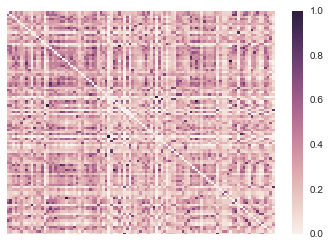

In [72]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

#fetchAnswerPostsData()

myDict = users_questions_tags()
ans = pd.DataFrame([myDict])
ans2 = ans.transpose()
    #res = pd.Series(final_map)
ans2.columns = ['similarity']
ans2.sort_values('similarity',inplace = True, ascending=False)

userSet = Set()
count = 0
for index, row in ans2.iterrows():
    elements = list(index)
    for user in elements:
        userSet.add(user)
        count = count + 1
        if(len(userSet) > 100):
            break
    if(len(userSet) > 100):
            break
#print userSet

axis = []
the_list = []
for key1 in userSet:
    tmp_list = []
    for key2 in userSet:
        my_tuple1 = (key1, key2)
        my_tuple2 = (key2, key1)
        buff1 = myDict.get(my_tuple1)
        buff2 = myDict.get(my_tuple2)
        
        if((buff1 is None) and (buff2 is None)):
            tmp_list.append(0.0)
        elif(buff1 is not None):
            tmp_list.append(buff1)
        else:
            tmp_list.append(buff2)
       
    the_list.append(tmp_list)
#print the_list


intensity = np.array(the_list)
res = pd.DataFrame(the_list)
res = res[res.columns].astype(float)
np.savetxt("foo.csv", res, delimiter=",")
#print res
#print intensity
sns.heatmap(res, xticklabels=False, yticklabels=False, linewidths=0)

'''
x, y = np.meshgrid(range(intensity.shape[0]),range(intensity.shape[0] + 1))
#now just plug the data into pcolormesh, it's that easy!
plt.pcolormesh(x, y, intensity)
plt.colorbar() #need a colorbar to show the intensity scale
plt.show() #boo
#print the_list
'''

'''
res = pd.DataFrame(the_list)
#res.plot(kind='hexbin', x='a', y='b', gridsize=25)
plt.pcolor(res)
plt.yticks(np.arange(0.5, len(res.index), 1), res.index)
plt.xticks(np.arange(0.5, len(res.columns), 1), res.columns)
plt.show()
'''
'''
my_tuple2 = ('1496715', '2893413')
print myDict.get(my_tuple2)
'''
#print userSet


Next, let's create some time series from the data. Look at the top 100 users with the most question posts. For each user, your time series will be the CreationDate of the questions posted by that user. You may want to make multiple time series for each user based on the first tag of the questions. Compare the time series using one of the methods discussed in class. Document your findings. (30 pts)

In [28]:
import pandas as pd
answer_df = pd.read_csv('question_dataframe.csv')
questions = answer_df
answer_df = answer_df.groupby(['ownerId']).count()
res = answer_df['date'].copy()
#sort by descending order
res.sort(ascending = False)
#fetch the top 1000 users on the list
my_dict = {}
test = pd.DataFrame(res.head(100))
for index, row in test.iterrows():
    my_dict[index] = row['date']

data = pd.DataFrame(my_dict.items())
data.columns = ['ownerId','count']

questions.columns = ['i', 'id', 'date','ownerId','tag']
questions.drop('i', axis=1, inplace=True)
questions.drop('tag', axis=1, inplace=True)
questions.drop('id', axis=1, inplace=True)
buff = pd.merge(data, questions, left_on='ownerId', right_on='ownerId', how='left')

for index, row in buff.iterrows():
    print row['date'].split('T')[0]

#print data
#buff = pd.merge(data, answer_df, how='left')
#print buff

2015-01-03
2015-01-03
2015-01-08
2015-01-08
2015-01-09
2015-01-10
2015-01-11
2015-01-11
2015-01-11
2015-01-11
2015-01-15
2015-01-15
2015-01-15
2015-01-18
2015-01-18
2015-01-18
2015-01-19
2015-01-19
2015-01-24
2015-01-24
2015-02-05
2015-02-08
2015-02-09
2015-02-09
2015-02-09
2015-02-10
2015-02-10
2015-02-11
2015-02-11
2015-02-12
2015-02-17
2015-02-17
2015-02-17
2015-02-17
2015-02-20
2015-02-22
2015-02-23
2015-02-24
2015-02-24
2015-02-24
2015-02-25
2015-02-25
2015-02-26
2015-02-26
2015-02-26
2015-02-26
2015-02-27
2015-02-27
2015-02-27
2015-02-28
2015-02-28
2015-02-28
2015-02-28
2015-03-01
2015-03-03
2015-03-03
2015-03-04
2015-03-05
2015-03-09
2015-03-13
2015-03-14
2015-03-15
2015-03-16
2015-03-17
2015-03-18
2015-04-03
2015-04-05
2015-04-05
2015-04-06
2015-04-06
2015-04-07
2015-04-09
2015-04-09
2015-04-09
2015-04-09
2015-04-14
2015-04-14
2015-04-15
2015-04-15
2015-04-15
2015-04-16
2015-04-16
2015-04-17
2015-04-17
2015-04-17
2015-04-18
2015-04-18
2015-04-19
2015-04-19
2015-04-20
2015-04-21

/Users/yili/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


Next, let's create some time series from the data. Look at the top 100 users with the most question posts. For each user, your time series will be the `CreationDate` of the questions posted by that user. You may want to make multiple time series for each user based on the first tag of the questions. Compare the time series using one of the methods discussed in class. Document your findings. **(30 pts)**

You may find the [pandas.DataFrame.resample module](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) helpful.

Plot the 2 most similar and the 2 most different time series. **(10 pts)**

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()